<a href="https://www.kaggle.com/code/hanpat99/household-energy-optimization-prediction-ff?scriptVersionId=134482603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

- **copy of final submission [notebook](https://www.kaggle.com/code/jatinderbhambri/fs-household-energy-optimization-prediction)**

# **Machine Learning Hackathon** 

## **Topic: Energy Usage Prediction System**

<a id="0"></a>
# Workflow
[0. Problem Statement](#99)

[1. Data Loading, Imports](#1)

[2. Preprocessing](#2)

[3. Feature Engineering,  Exploratory Data Analysis](#3)

> - [3.1 Univariate Analysis](#3.1)    
> - [3.2 Bivariate Analysis](#3.2)    
> - [3.3 Multivariate Analysis](#3.3)    
> - [3.4 Summary Observations and Recommendations](#3.4)
   
[4. Model Training, Hyperparameter tuning, Evaluation](#4)

[5. Inferences, Recommendations to the Client and Model Summary](#5)

<a id="99"></a>

    
## [**Problem statement:**](#0)
    
Create a methodology that utilizes data to **predict the electricity consumption** of
household appliances in low-energy homes, and **provide suggestions for optimizing
energy usage by identifying controllable factors.**

This approach will involve collecting data on various factors such as 
    a) appliance usage patterns,
    b) weather conditions, and 
    c) other environmental factors 
that affect energy consumption. The data will be analyzed to determine trends and patterns that can inform recommendations for efficient energy usage.

These **recommendations may include adjusting the timing of appliance usage, implementing energy-efficient appliances, and taking advantage of renewable energy sources.**

Ultimately, the goal is to help homeowners reduce their electricity bills and minimize
their environmental impact by maximizing the efficient use of energy.

Attribute Information:
    
1. date : time year-month-day hour:minute:second
2. **Appliances : energy use ( transformed data), Logarithmic value from Wh ----> Target**
3. lights, energy use of light fixtures in the house in Wh
4. T1, Temperature in kitchen area, in Celsius
5. RH_1, Humidity in kitchen area, in %
6. T2, Temperature in living room area, in Celsius
7. RH_2, Humidity in living room area, in %
8. T3, Temperature in laundry room area
9. RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from XYZ weather station), in Celsius
23. Pressure (from XYZ weather station), in mm Hg
24. RH_out, Humidity outside (from XYZ weather station), in %
25. Wind speed (from XYZ weather station), in m/s
26. Visibility (from XYZ weather station), in km
27. Tdewpoint (from XYZ weather station), Â°C
28. rv1, Random variable 1, non dimensional
29. rv2, Random variable 2, non dimensional

**Project Objectives:**
- **Analyze** the data to find patterns
- **Identify** drivers of consumption and recommending the controllable features for optimizing consumption
- **Build** a Machine Learning model for predicting energy consumption on unseen data
- **Recommend** options for reducing energy consumption and optimized utilization

**Context**
- **Increasing Global Energy Demand** makes
sustainability a pressing concern
- Energy Usage **Optimization and Prediction is crucial**
for addressing these challenges
- **Solutions** built using Advanced Analytics and
Machine Learning techniques **hold the potential to
transform resource planning**
- Energy distribution can be optimized by accurately
predicting consumption patterns
- Implementation of such solutions can contribute to a
greener future

<a id="1"></a>
# [1. Data Loading, Imports](#0)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Set plot style
sns.set(color_codes=True)

plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/household-energy-consumption-dataset/train.csv')
df_t = pd.read_csv('/kaggle/input/household-energy-consumption-dataset/test.csv')

<a id="2"></a>
# [2. Preprocessing](#0)

**Dataframe description**

In [3]:
# lets start with the df
print('='*80)
print('Shape:', df.shape)

print('='*80)
print('Missing Data')

missing_indices = set()
for index, row in df.iterrows():
    if row.isnull().any():
        missing_indices.add(index)
print('Missing Indices Count:',len(missing_indices),'\nMissing Values Count:', df.isna().sum().sum())

print('='*80)
print('Information about dataset')
print('\n',df.info())

print('='*80)

Shape: (15788, 30)
Missing Data
Missing Indices Count: 0 
Missing Values Count: 0
Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15788 entries, 0 to 15787
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15788 non-null  int64  
 1   date         15788 non-null  object 
 2   lights       15788 non-null  int64  
 3   t1           15788 non-null  float64
 4   rh_1         15788 non-null  float64
 5   t2           15788 non-null  float64
 6   rh_2         15788 non-null  float64
 7   t3           15788 non-null  float64
 8   rh_3         15788 non-null  float64
 9   t4           15788 non-null  float64
 10  rh_4         15788 non-null  float64
 11  t5           15788 non-null  float64
 12  rh_5         15788 non-null  float64
 13  t6           15788 non-null  float64
 14  rh_6         15788 non-null  float64
 15  t7           15788 non-null  float64
 16  rh_7         15788 non

In [4]:
print('First 5 rows: \n')
print('='*80)
df.head()

First 5 rows: 



,ID,date,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,appliances
0,2133,2016-01-26 12:30:00,0,19.890,45.500,19.200,45.090,20.390,44.290,19.100,46.700,17.511,53.000,11.100,98.433,17.500,43.500,18.111,50.000,17.167,48.700,10.300,761.900,85.500,7.500,23.500,7.950,39.241,39.241,3.912
1,19730,2016-05-27 17:20:00,0,25.567,46.560,25.890,42.026,27.200,41.163,24.700,45.590,23.200,52.400,24.797,1.000,24.500,44.500,24.700,50.074,23.200,46.790,22.733,755.200,55.667,3.333,23.667,13.333,43.097,43.097,4.605
2,3288,2016-02-03 13:00:00,0,22.500,44.430,21.533,42.590,21.963,44.555,22.000,40.467,19.100,55.327,6.530,61.463,19.290,34.320,20.567,41.331,18.600,45.530,6.600,760.200,64.000,8.000,40.000,0.200,42.055,42.055,4.248
3,7730,2016-03-05 09:20:00,0,19.790,38.060,17.200,40.933,20.600,37.163,18.390,37.000,18.290,42.260,2.790,79.933,18.100,32.000,20.500,42.590,18.390,40.723,2.100,741.533,94.333,1.000,48.667,1.233,12.616,12.616,3.689
4,8852,2016-03-13 04:20:00,0,20.600,35.290,17.100,39.790,20.290,37.000,19.500,34.500,18.200,49.000,-0.667,68.530,20.700,33.590,22.700,39.260,18.927,40.090,-0.867,768.267,92.333,1.667,34.000,-1.933,10.898,10.898,3.689


In [5]:
print('Describe the dataset \n')
print('='*80)
df.describe()

Describe the dataset 



,ID,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,appliances
count,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000,15788.000
mean,9872.640,3.809,21.689,40.266,20.345,40.429,22.269,39.248,20.854,39.047,19.598,50.949,7.914,54.637,20.267,35.411,22.029,42.964,19.488,41.571,7.418,755.532,79.823,4.031,38.331,3.781,25.028,25.028,4.305
std,5712.930,7.963,1.610,3.957,2.196,4.068,2.008,3.246,2.051,4.329,1.851,9.002,6.102,31.211,2.117,5.109,1.959,5.219,2.022,4.156,5.328,7.373,14.895,2.436,11.816,4.202,14.505,14.505,0.657
min,1.000,0.000,16.790,27.023,16.100,20.463,17.200,28.767,15.100,27.660,15.330,30.167,-6.030,1.000,15.390,23.230,16.307,29.600,14.890,29.167,-5.000,729.300,24.000,0.000,1.000,-6.600,0.006,0.006,2.303
25%,4922.750,0.000,20.776,37.399,18.823,37.900,20.790,36.900,19.533,35.590,18.290,45.433,3.595,29.992,18.700,31.500,20.790,39.090,18.000,38.530,3.633,750.917,70.333,2.000,29.000,0.933,12.510,12.510,3.912
50%,9907.500,0.000,21.600,39.663,20.000,40.500,22.100,38.560,20.633,38.463,19.390,49.078,7.300,55.297,20.060,34.900,22.100,42.428,19.390,40.933,6.933,756.100,84.000,3.667,40.000,3.433,24.912,24.912,4.094
75%,14821.250,0.000,22.600,43.060,21.500,43.290,23.290,41.760,22.100,42.193,20.632,53.703,11.263,83.301,21.600,39.017,23.390,46.562,20.600,44.363,10.417,760.937,91.667,5.500,40.000,6.600,37.666,37.666,4.605
max,19734.000,70.000,26.260,57.423,29.857,54.767,29.236,50.163,26.200,51.090,25.795,96.322,28.290,99.900,25.963,51.328,27.230,58.780,24.500,53.327,26.100,772.300,100.000,14.000,66.000,15.400,49.997,49.997,6.985


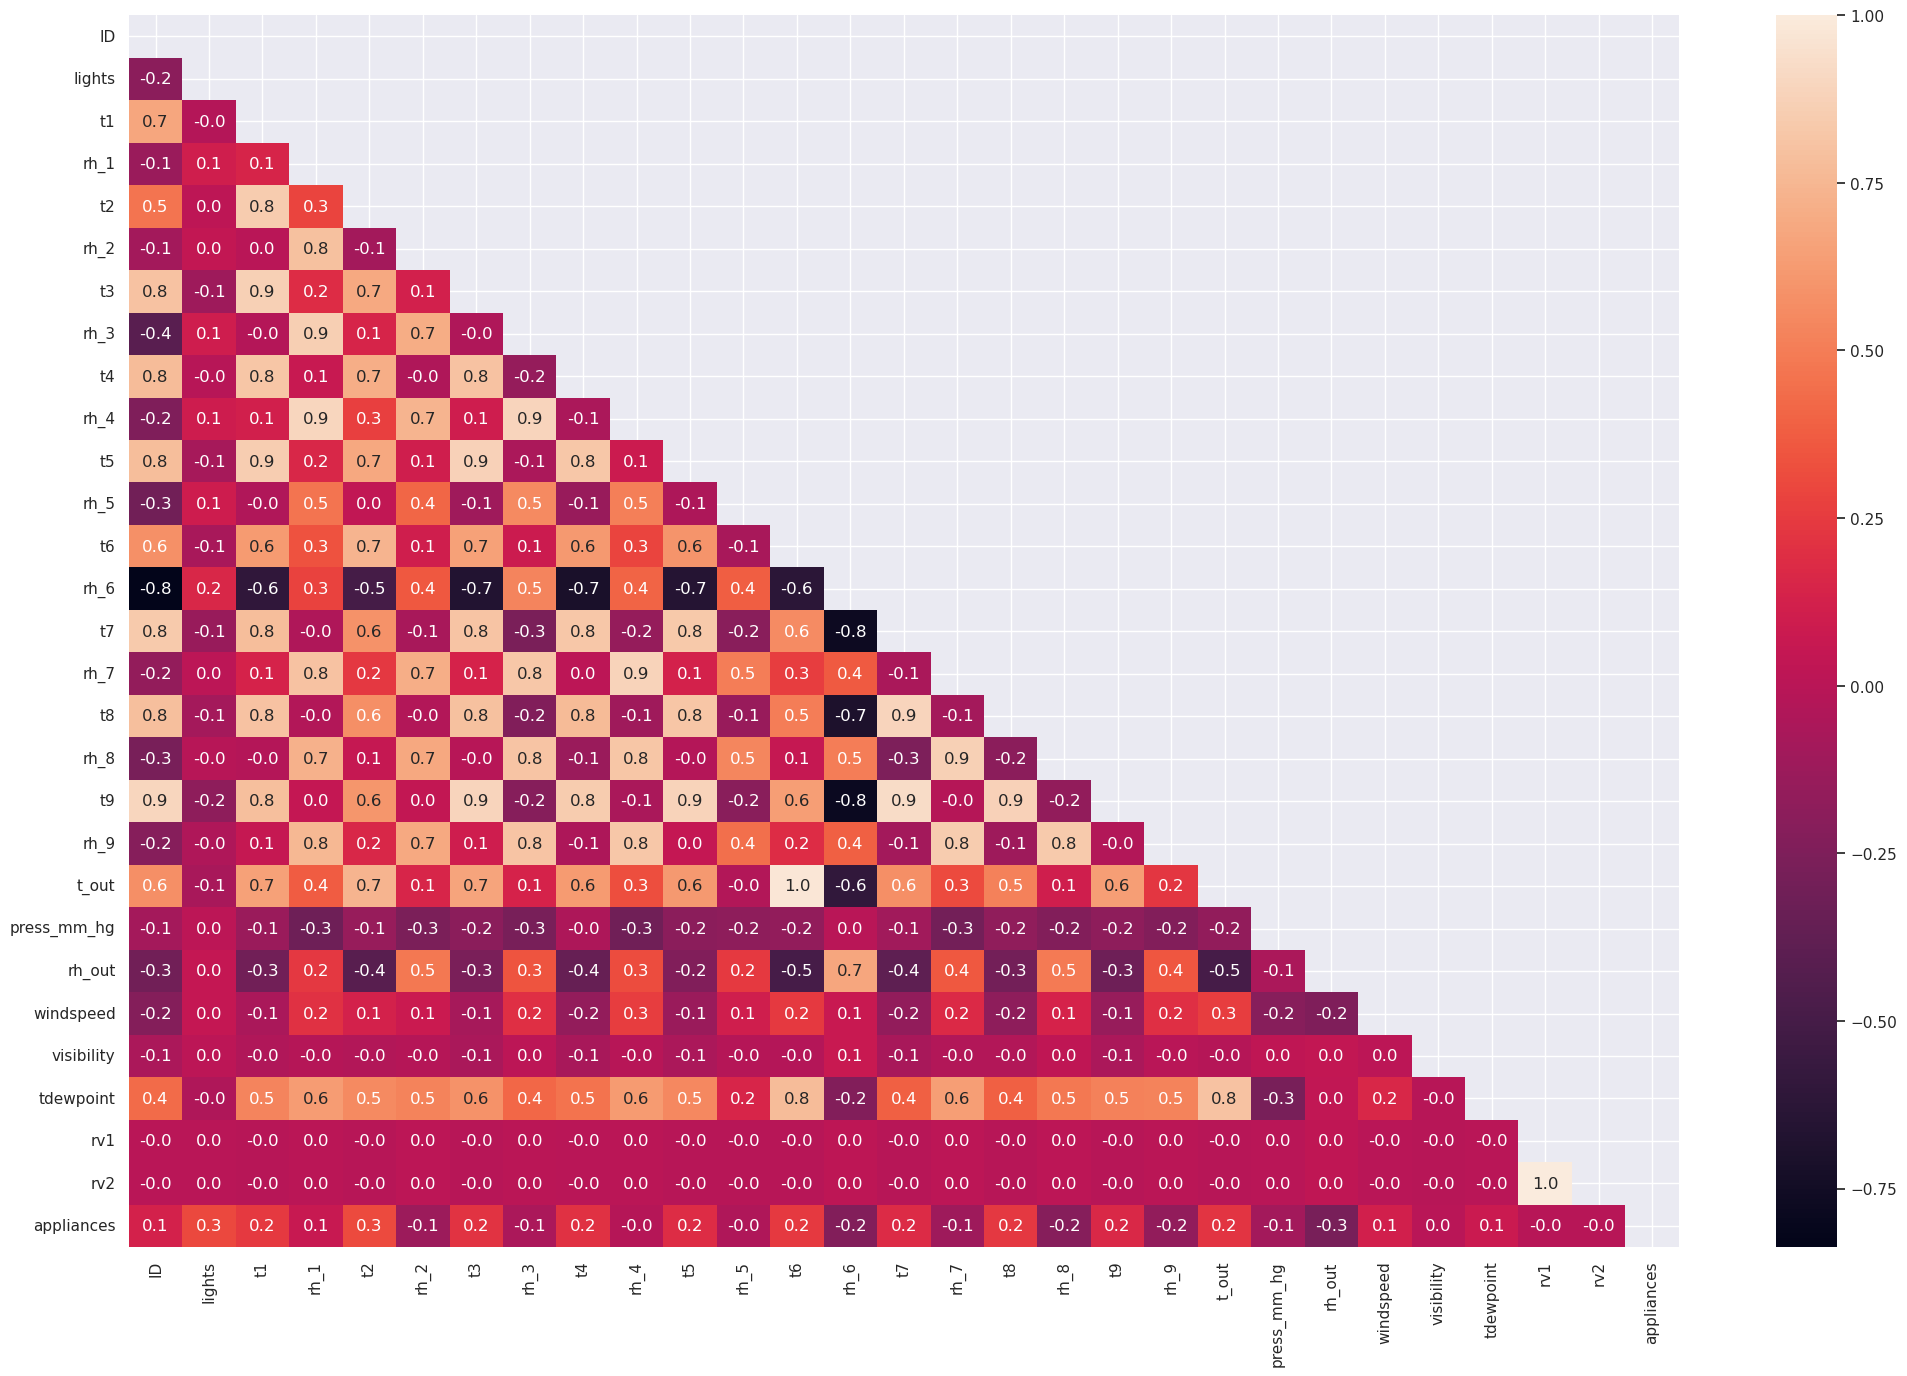

In [6]:
## Correlation checks
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(method = 'spearman'), fmt = '.1f',  annot = True, mask = np.triu(df.corr()))
plt.savefig(f'corr-before-preprocessing.png')

**Duplicates**

In [7]:
print('Duplicates:\n','='*80)
print('Duplicates count:\t',df.duplicated().sum())

Duplicates:
Duplicates count:	 0


**Outlier Analysis and Handling**

In [8]:
## Checking for skewness/outliers
print('Feature Skewness \n','='*80)
df.skew()

Feature Skewness 


ID            -0.006
lights         2.206
t1             0.115
rh_1           0.448
t2             0.890
rh_2          -0.264
t3             0.444
rh_3           0.464
t4             0.166
rh_4           0.437
t5             0.550
rh_5           1.881
t6             0.597
rh_6          -0.243
t7             0.248
rh_7           0.238
t8            -0.257
rh_8           0.304
t9             0.375
rh_9           0.361
t_out          0.531
press_mm_hg   -0.408
rh_out        -0.920
windspeed      0.852
visibility     0.433
tdewpoint      0.239
rv1            0.005
rv2            0.005
appliances     1.178
dtype: float64

**Outlier Analysis**

In [9]:
from scipy import stats
## Let's identify outliers, beyond 2 standard deviations from feature means
outlier_row_indices = set()
outlier_features = dict()
for column in df.drop(['ID','date'], axis =1).columns:
    z_scores = stats.zscore(df[column])
    outlier_row_indices.update(np.where(np.abs(z_scores) > 3)[0])
    outlier_features[column]=len(np.where(np.abs(z_scores) > 3)[0])
    
print('No ofrows with outlier attributes:\t',len(outlier_row_indices))
print('Percentage of rows with outlier attributes in dataset: {:.2%}'.format(len(outlier_row_indices) / df.shape[0]))
print('\n', '='*80)
print('Feature wise outlier counts')
outlier_features

No ofrows with outlier attributes:	 1735
Percentage of rows with outlier attributes in dataset: 10.99%

Feature wise outlier counts


{'lights': 528,
 't1': 10,
 'rh_1': 86,
 't2': 163,
 'rh_2': 99,
 't3': 43,
 'rh_3': 12,
 't4': 0,
 'rh_4': 0,
 't5': 21,
 'rh_5': 459,
 't6': 80,
 'rh_6': 0,
 't7': 0,
 'rh_7': 17,
 't8': 0,
 'rh_8': 6,
 't9': 0,
 'rh_9': 0,
 't_out': 66,
 'press_mm_hg': 82,
 'rh_out': 126,
 'windspeed': 72,
 'visibility': 33,
 'tdewpoint': 0,
 'rv1': 0,
 'rv2': 0,
 'appliances': 200}

**We will not drop z-score based outliers at the moment, since it is atmospheric and consumption data**

Based on the information you provided, it seems that the **variables t1 to t9 and rh_1 to rh_9 are not pairwise correlated, except for t6 and rh_6.**

This suggests that the building interiors are air-conditioned. **Relative humidity (rh) is typically defined in relation to ambient air conditions,** and if the variables representing temperature and relative humidity within the building show no correlation except for the external conditions (t6 and rh_6), i**t indicates that the interior conditions are controlled and different from the ambient environment.**


<a id="3"></a>
# [3. Feature Engineering,  Exploratory Data Analysis](#0)

**Reformat timestamp feature and extract date, month, week, day, hour**
- df
- df_t

In [10]:
## df
df['month'] = pd.to_datetime(df['date']).dt.month
df['date_2'] = pd.to_datetime(df['date']).dt.date
df['time'] = pd.to_datetime(df['date']).dt.time
df['week'] = pd.to_datetime(df['date']).dt.week
df['day_num'] = pd.to_datetime(df['date']).dt.dayofweek
df['time'] = pd.to_datetime(df['date']).dt.time
df['day_type'] = pd.to_datetime(df['date']).dt.dayofweek.apply(lambda x: '0' if x < 5 else '1')
df['week_num'] = pd.to_datetime(df['date']).dt.week

df["hour"] = pd.to_datetime(df["date"]).dt.hour
df["weekday"] = pd.to_datetime(df["date"]).dt.weekday

In [11]:
## df_t
df_t['month'] = pd.to_datetime(df_t['date']).dt.month
df_t['date_2'] = pd.to_datetime(df_t['date']).dt.date
df_t['time'] = pd.to_datetime(df_t['date']).dt.time
df_t['week'] = pd.to_datetime(df_t['date']).dt.week
df_t['day_num'] = pd.to_datetime(df_t['date']).dt.dayofweek
df_t['time'] = pd.to_datetime(df_t['date']).dt.time
df_t['day_type'] = pd.to_datetime(df_t['date']).dt.dayofweek.apply(lambda x: '0' if x < 5 else '1')
df_t['week_num'] = pd.to_datetime(df_t['date']).dt.week

df_t["hour"] = pd.to_datetime(df_t["date"]).dt.hour
df_t["weekday"] = pd.to_datetime(df_t["date"]).dt.weekday

<a id="feature_vars"></a>
**Lets group our features. See where this is implemented [here.](#model_vars)**

In [12]:
col_temp = ["t1","t2","t3","t4","t5","t6","t7","t8","t9"]

col_hum = ["rh_1","rh_2","rh_3","rh_4","rh_5","rh_6","rh_7","rh_8","rh_9"]

col_weather = ["t_out", "tdewpoint", "rh_out","press_mm_hg",
                "windspeed","visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_time = ["hour", "weekday"]

col_target = ["appliances"]

In [13]:
df[['day_num']].value_counts()

day_num
1          2307
3          2300
2          2287
4          2287
6          2221
0          2202
5          2184
dtype: int64

<a id="3.1"></a>
# [3.1 Univariate Analysis](#0)

Lets understand feature distributions

In [14]:
len(df.columns)

39

In [15]:
df.columns

Index(['ID', 'date', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint', 'rv1', 'rv2', 'appliances', 'month', 'date_2', 'time',
       'week', 'day_num', 'day_type', 'week_num', 'hour', 'weekday'],
      dtype='object')

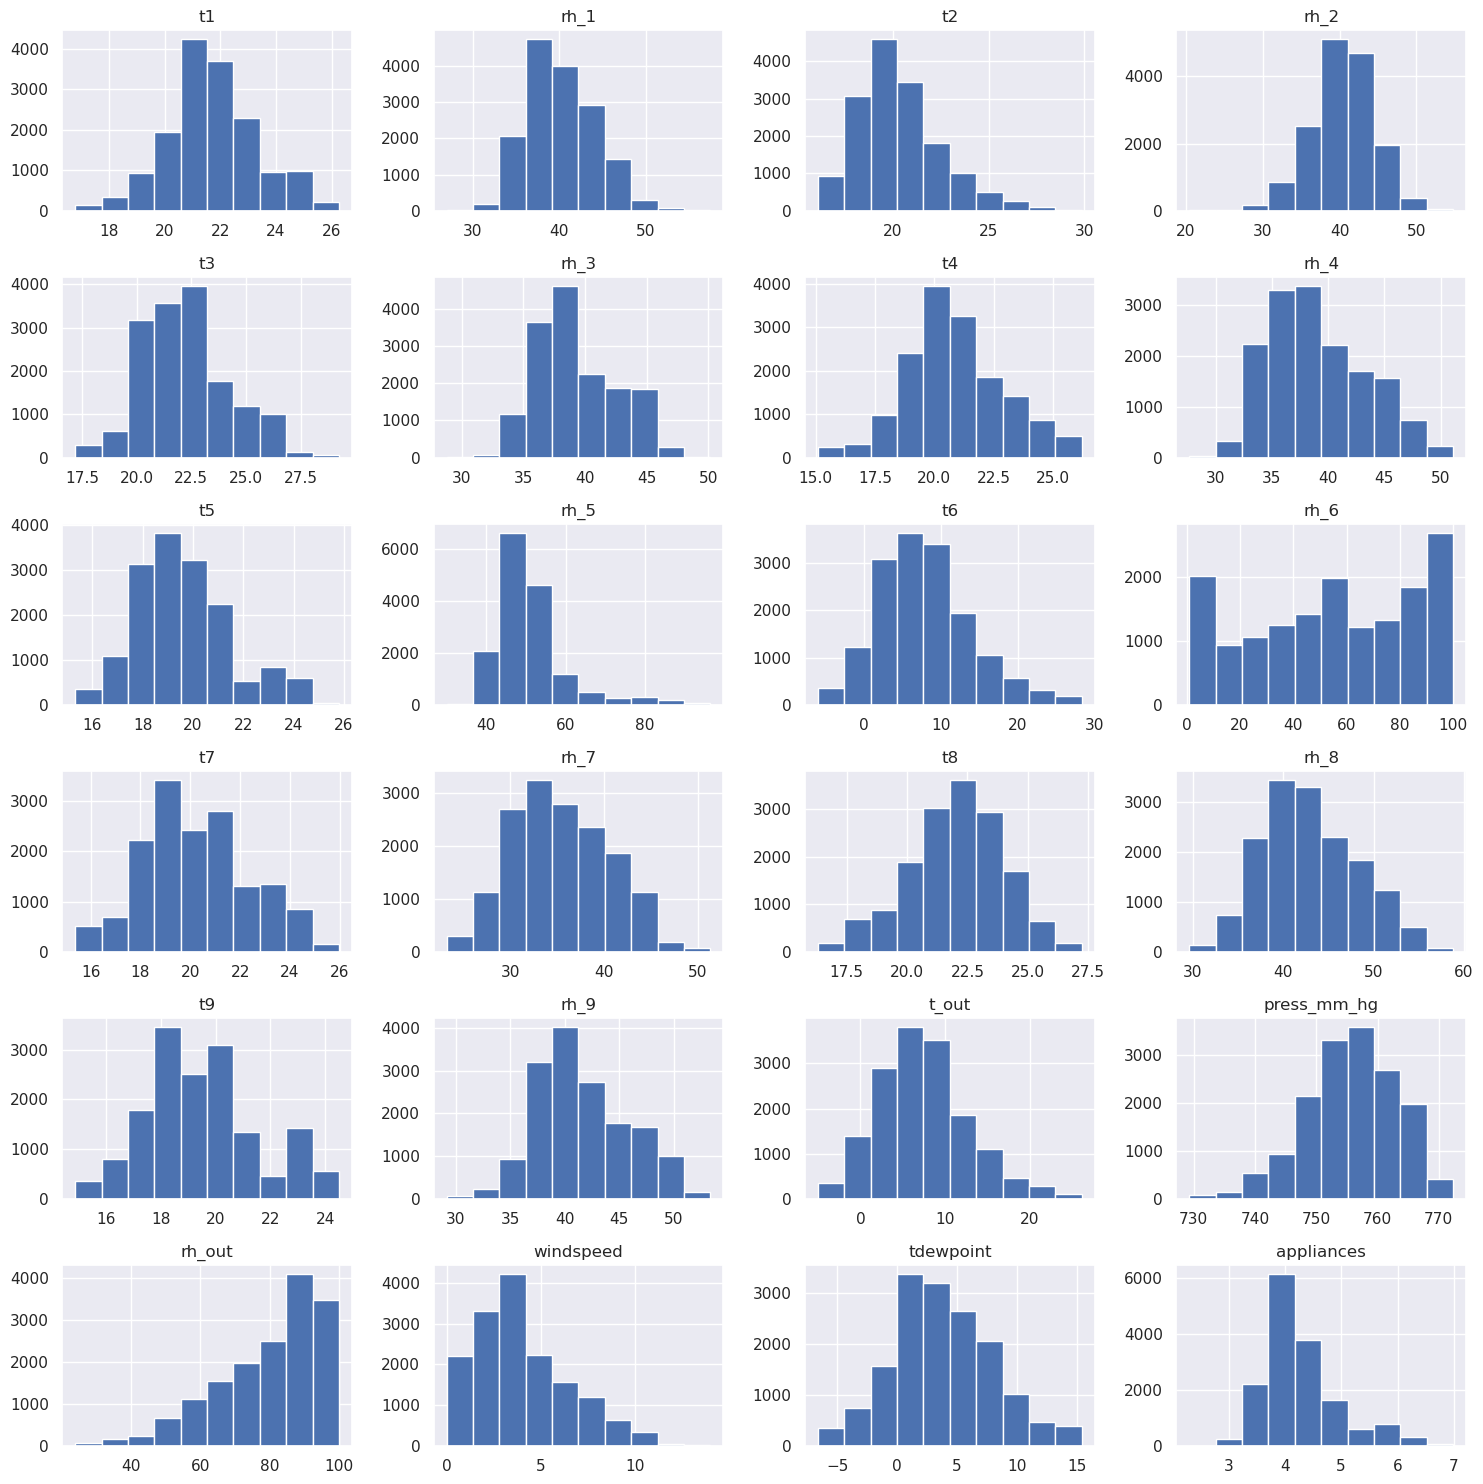

In [16]:
drplist= ['ID','month','rv1','rv2','visibility',\
       'week','day_num', 'week_num', 'lights', 'hour', 'weekday']
numeric_columns = df.select_dtypes(exclude='O').drop(drplist, axis = 1).columns.to_list()

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

axes = axes.flatten()

for i, variable in enumerate(numeric_columns):
    df[variable].hist(ax=axes[i])
    axes[i].set_title(variable) 
    #axes[23].set_visible(False)
    #axes[24].set_visible(False)
    
fig.tight_layout()  
plt.show()

In [17]:
df[df['month']==1].groupby('date_2').agg({'appliances':'mean'}).appliances

date_2
2016-01-11   4.646
2016-01-12   4.046
2016-01-13   4.289
2016-01-14   4.591
2016-01-15   4.516
2016-01-16   4.440
2016-01-17   4.599
2016-01-18   3.983
2016-01-19   3.979
2016-01-20   4.350
2016-01-21   4.123
2016-01-22   3.680
2016-01-23   4.232
2016-01-24   4.474
2016-01-25   3.950
2016-01-26   3.917
2016-01-27   3.680
2016-01-28   3.569
2016-01-29   3.785
2016-01-30   4.374
2016-01-31   4.504
Name: appliances, dtype: float64

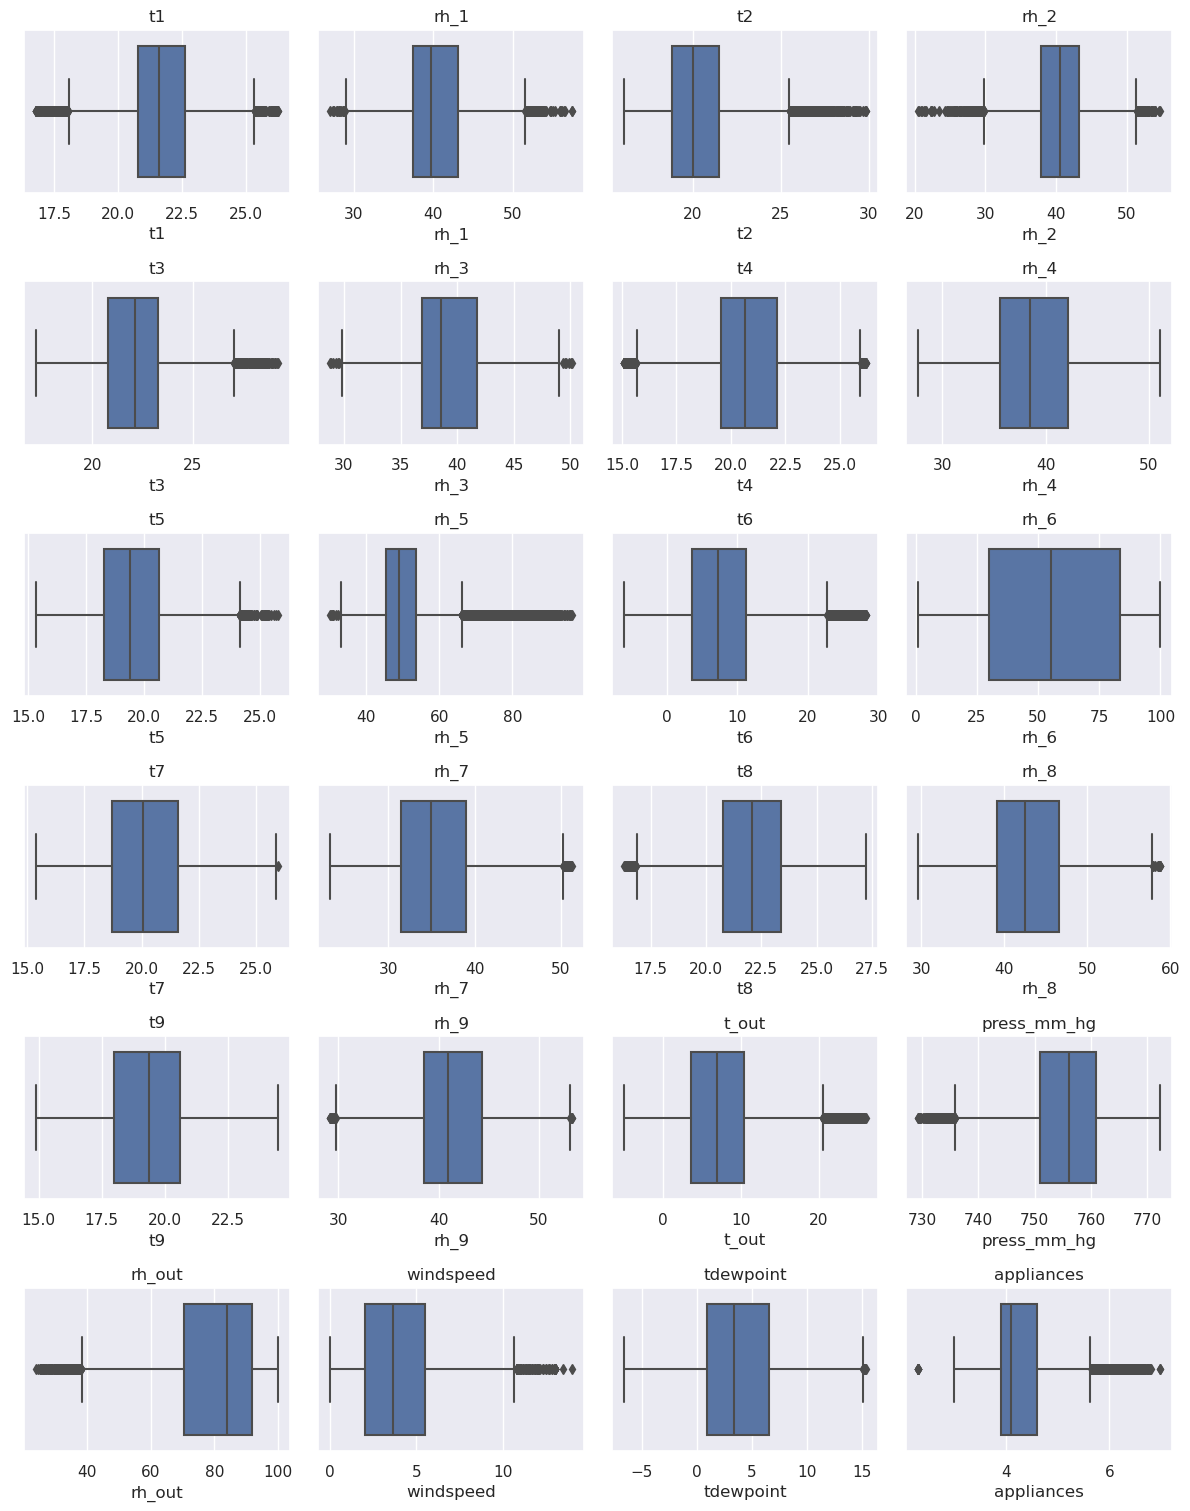

In [18]:
numerical_columns = df.select_dtypes(exclude='O').drop(drplist,axis = 1).columns.tolist()
fig, axes = plt.subplots(nrows=20, ncols=4, figsize=(12, 50))
axes = axes.flatten()

for i, variable in enumerate(numerical_columns):
    sns.boxplot(x=df[variable], ax=axes[i]) 
    axes[i].set_title(variable) 
#     plt.savefig(f'boxplot-{variable}.jpg')
    
if len(numerical_columns) < len(axes):
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()

plt.show()

**Inferences from Univariate Analysis**
1. **`rv1` and `rv2` features show no visible variance.** We'll verify their correlation strength against the target and make a retain/drop decision.
2. **`lights` feature has largely zero valuess.** We'll verify their correlation strength against the target and make a retain/drop decision.
3. **Temperature and Relative Humidity features'** histograms as captured by sensors 0-9 have **similar distributions.** From **psychrometric properties of ambient air,** relative humidity of air is defined for a given temperature. So it follows that, unless air is conditioned with humidity adjustments, **`t0-t9` and `rh_0-rh_9` should be pairwise correlated**.
4. **Windspeed and relative humidity move in the opposite directions** and the same is observed in weather station **`windspeed`** and **`rh_out`** features. Higher windspeeds usually lowers humidity as they carry moisture away. This property of air becomes prominent, in colder regions with drier air, such as the location of our building.
5. The day-wise consumption reveals some insights during winter and summer months of Jan and May. The transition spring months seems to see random consumption.

<a id="3.2"></a>
# [3.2 Bivariate Analysis](#0)

**Daily consumption trendline**

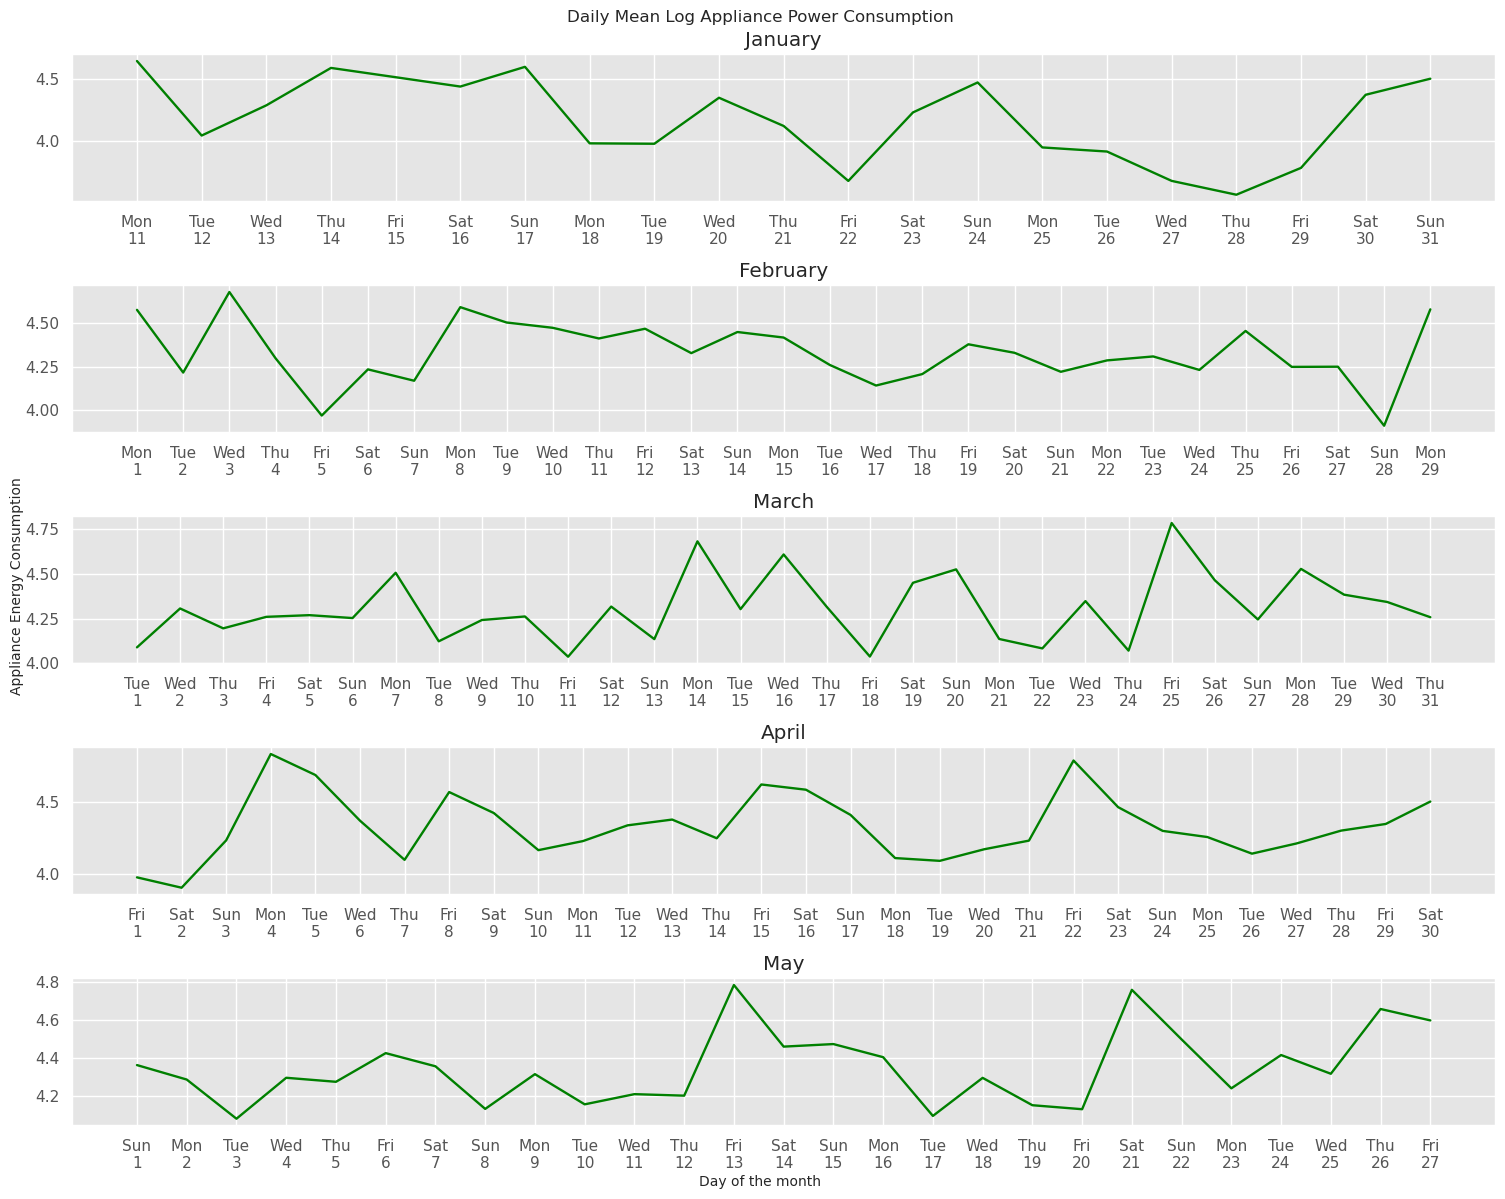

In [19]:
plt.style.use('ggplot')
months = [1, 2, 3, 4, 5]
m_names = ['January', 'February', 'March', 'April', 'May']
subplots = [511, 512, 513, 514, 515]

fig, axs = plt.subplots(len(months), 1, figsize=(15, 12))

for i, (month, m_name) in enumerate(zip(months, m_names)):
    ax = axs[i]
    df_month = df[df['month'] == month]
    sorted_dates = sorted(list(df_month['date_2'].unique()))

    # Get the mean appliance values for the current month
    y = df_month.groupby('date_2').agg({'appliances': 'mean'}).appliances.to_list()

    ax.plot(sorted_dates, y, color='green', linewidth=1.7)
    ax.set_title(m_name)

    # Set the x-axis tick positions and labels
    day_of_week_labels = [date.strftime('%a') for date in sorted_dates]
    day_of_month_labels = [date.day for date in sorted_dates] 
    
    x_labels = \
    [f'{dow}\n{dom}' for dow, dom in zip(day_of_week_labels, day_of_month_labels)]  
    # Concatenate labels

    ax.set_xticks(sorted_dates)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', rotation=0)

plt.suptitle('Daily Mean Log Appliance Power Consumption')
fig.text(0, 0.5, 'Appliance Energy Consumption', va='center', rotation='vertical')
fig.text(0.5, 0, 'Day of the month', ha='center')
plt.tight_layout()
plt.savefig('Daily Mean Log Appliance Power Consumption.png')
plt.show();

Daily Consumption trends:
* Onset of the weekend: Upward trend in energy consumption
* Consistent downward trend in consumption levels at start of the week

In [20]:
df['hour'] = pd.to_datetime(df['date']).dt.strftime('%H').astype(int)

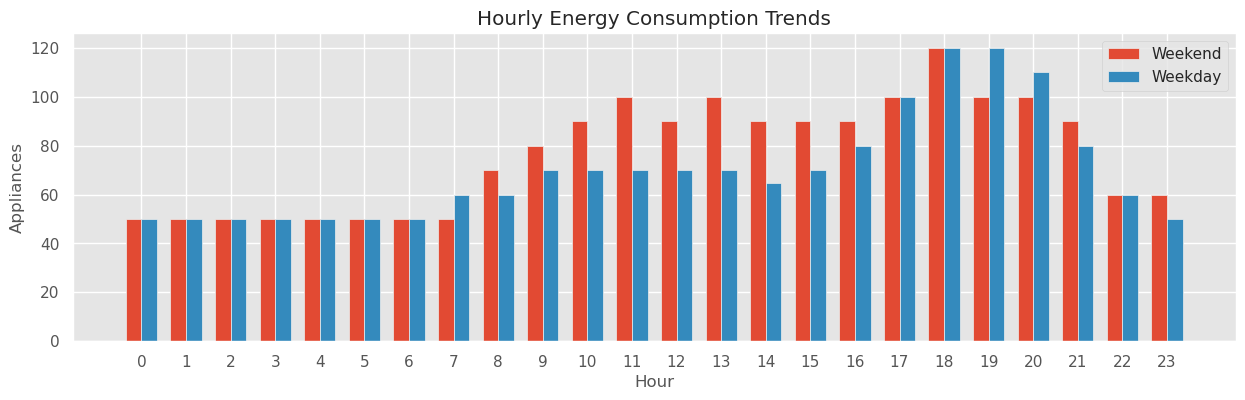

In [21]:
WeekendDf = df[df.day_type == '1'].groupby('hour')['appliances'].median().reset_index()
WeekdayDf = df[df.day_type == '0'].groupby('hour')['appliances'].median().reset_index()


WeekendDf['appliances'] = np.exp(WeekendDf['appliances'])
WeekdayDf['appliances'] = np.exp(WeekdayDf['appliances'])

bar_width = 0.35

x = np.arange(len(WeekendDf['hour']))

fig, ax = plt.subplots(figsize=(15, 4))

ax.bar(x - bar_width/2, WeekendDf['appliances'], bar_width, label='Weekend')

ax.bar(x + bar_width/2, WeekdayDf['appliances'], bar_width, label='Weekday')

ax.set_xticks(x)
ax.set_xticklabels(WeekendDf['hour'])

ax.set_xlabel('Hour')
ax.set_ylabel('Appliances')
ax.set_title('Hourly Energy Consumption Trends')

ax.legend()

plt.savefig(f'Weekend-vc-Weekday-hourly-trends.png')
plt.show()

Weekday vs Weekend Hourly Energy Consumption: Inferences
* Uptick in Energy consumption levels between 8AM to 9PM
* Peak Energy Consumption between the hours 5PM and 9PM
* Weekend daytime energy consumption is greater than that during weekdays.

**Ambient Morning Temperature (tout) tredline**

In [22]:
def corr_map(df,title,savefig_name='corr_map.jpg', method='spearman', 
             numeric_only = True, tick_size = 10, annot_size=14, 
             annot_kws=8, cbar=False):
    
    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))
    
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), 
                          fmt = '.2f', cbar=cbar, annot = True, 
                          annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')
    
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.tight_layout()
    plt.savefig(savefig_name)
    plt.show();

In [23]:
df['inv_log_appliance'] = np.exp(df['appliances'])

In [24]:
df['appliances'].max(), df['inv_log_appliance'].max()

(6.984716320118266, 1080.0000000000005)

In [25]:
droplist = ['ID','month','date_2','time','rv1','rv2','hour','inv_log_appliance',
       'visibility','weekday','week','day_num','day_type','week_num']

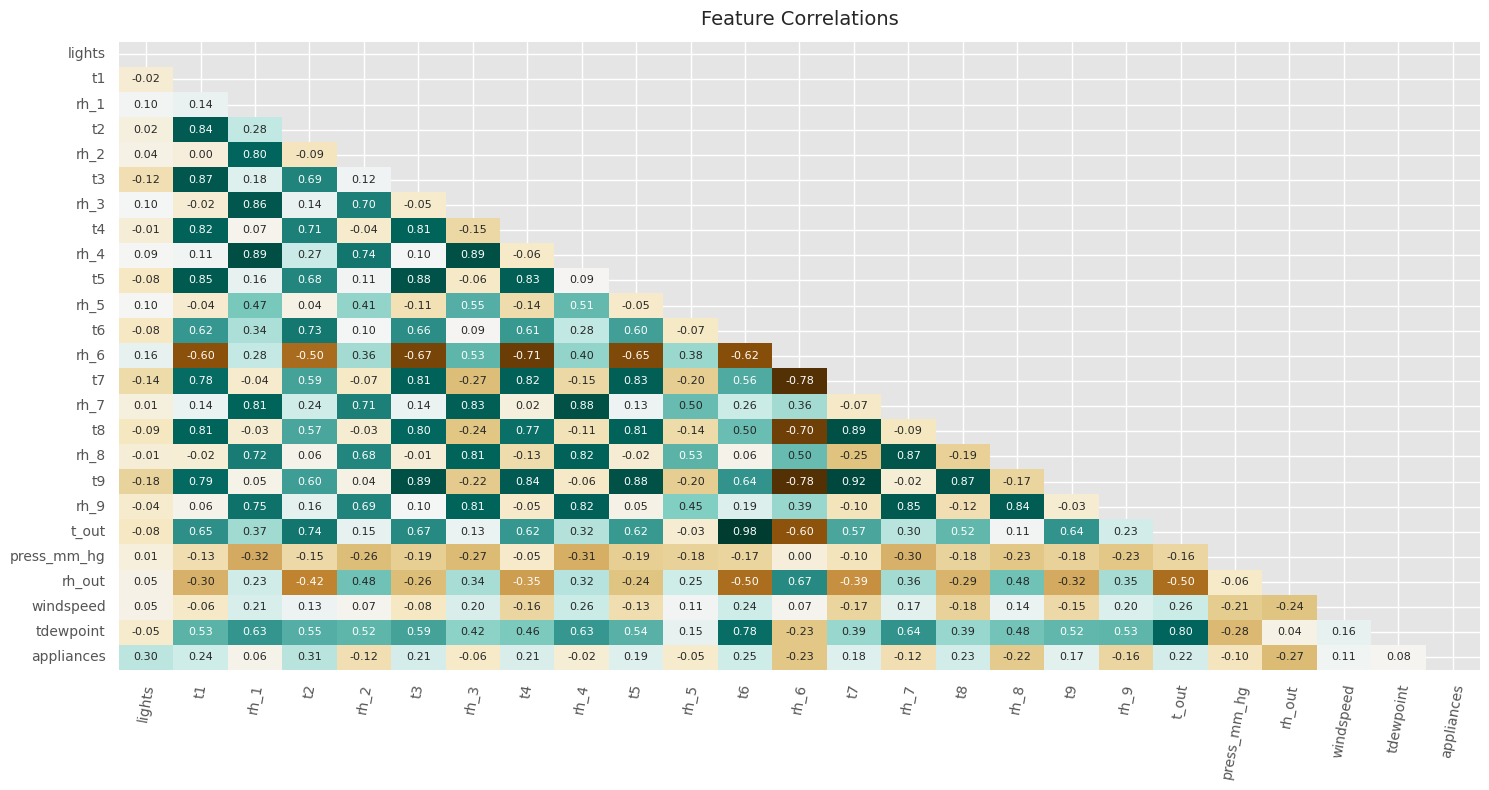

In [26]:
corr_map(df.drop(droplist,axis =1), method='spearman', 
         title='Feature Correlations', cbar=False, 
         savefig_name = 'spearman_correlations.jpg')

In [27]:
numer = np.log(df['rh_out']/100) + 17.625*df['t_out']/(243.04+df['t_out'])

In [28]:
df['tdew_new'] = 234.04*numer/(17.625-numer)

In [29]:
df[['tdew_new','tdewpoint']].corr()

,tdew_new,tdewpoint
tdew_new,1.000,1.000
tdewpoint,1.000,1.000


`rh_out`, `t_out` and `t_dewpoint` are related empirically. We will drop `rh_out` and `t_out` before model training.

In [30]:
df.columns

Index(['ID', 'date', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint', 'rv1', 'rv2', 'appliances', 'month', 'date_2', 'time',
       'week', 'day_num', 'day_type', 'week_num', 'hour', 'weekday',
       'inv_log_appliance', 'tdew_new'],
      dtype='object')

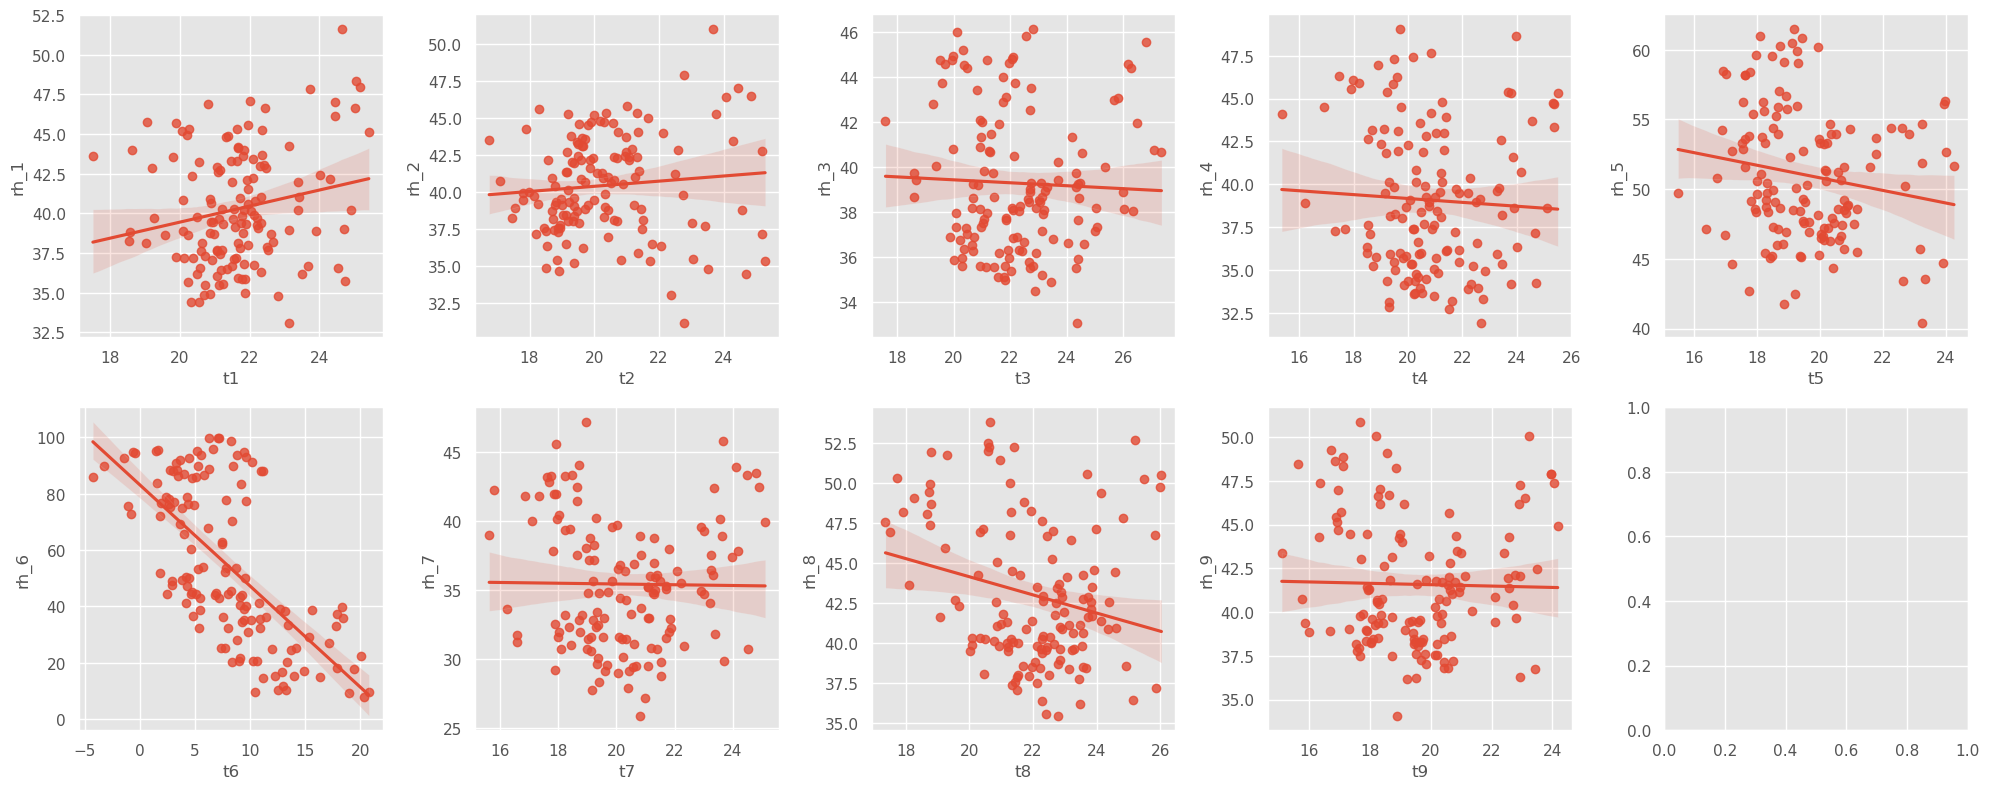

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for idx, (temp, hum) in enumerate(zip(col_temp, col_hum)):
    ax = axes[idx // 5, idx % 5]  # Get the appropriate subplot axis
    
    sns.regplot(x=df.groupby('date_2')[temp].mean(), y=df.groupby('date_2')[hum].mean(), ax=ax)
    ax.set_xlabel(temp)
    ax.set_ylabel(hum)
    #axes[1,4].set_visible(False)
plt.savefig('')    
plt.tight_layout()
plt.show()


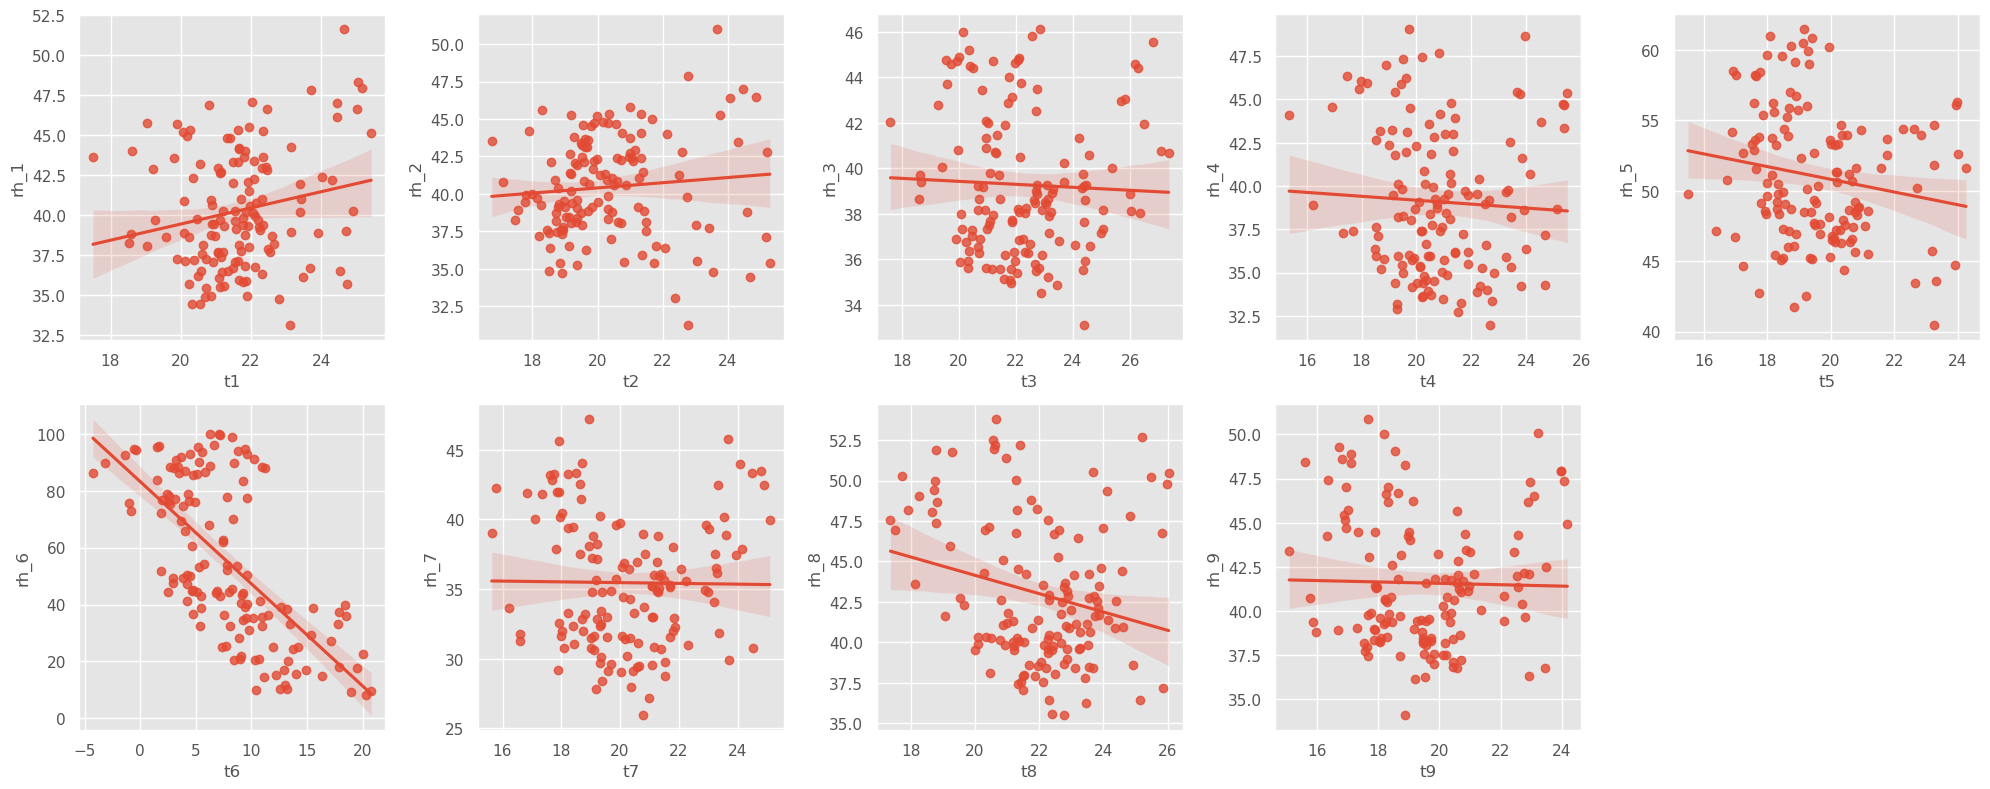

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for idx, (temp, hum) in enumerate(zip(col_temp, col_hum)):
    ax = axes[idx // 5, idx % 5]  # Get the appropriate subplot axis
    
    sns.regplot(x=df.groupby('date_2')[temp].mean(), y=df.groupby('date_2')[hum].mean(), ax=ax)
    ax.set_xlabel(temp)
    ax.set_ylabel(hum)
    axes[1,4].set_visible(False)
    
plt.tight_layout()
plt.show()


<a id="3.3"></a>
# [3.3 Multivariate Analysis](#0)

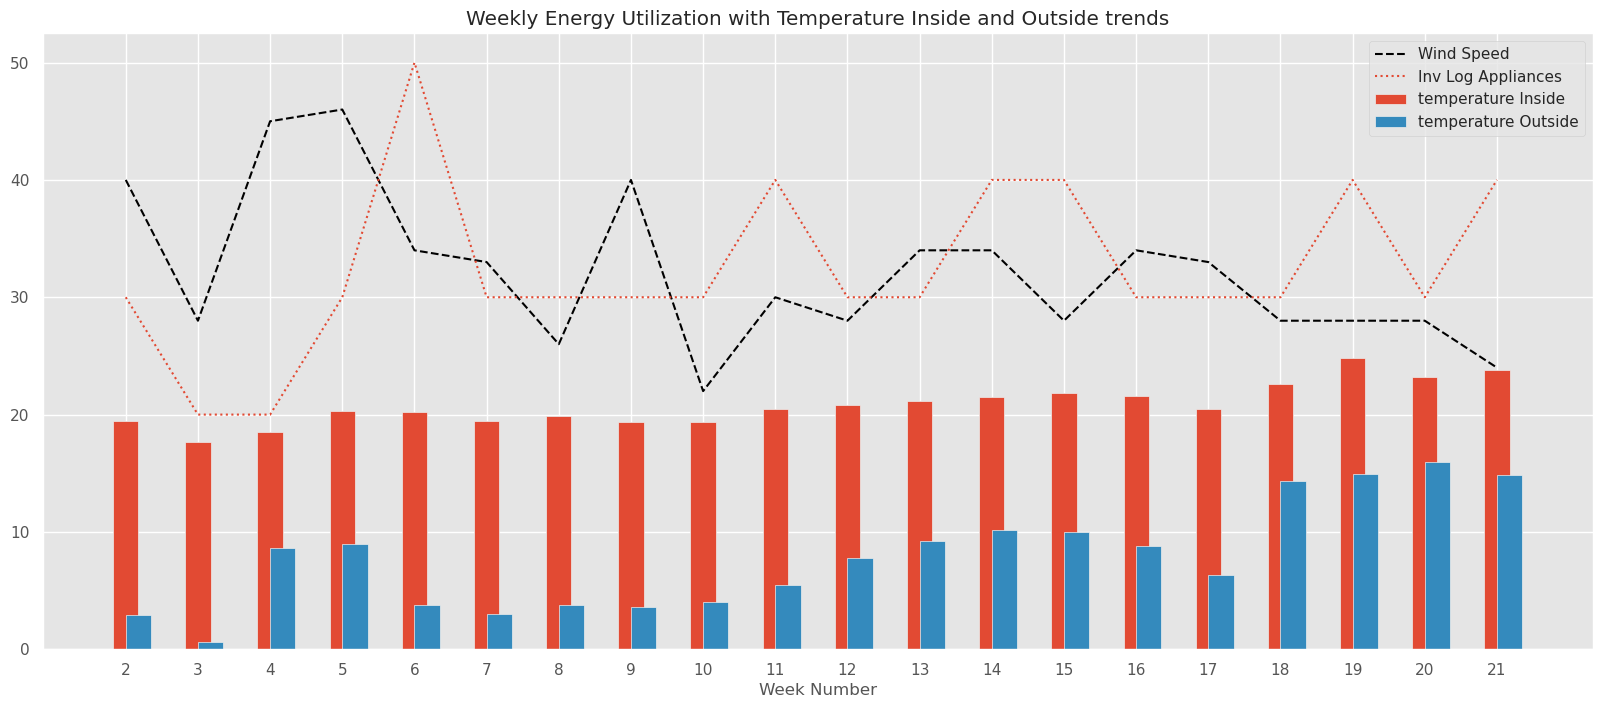

In [33]:
df['temperature_inside'] = df[['t1', 't2', 't3', 't4', 't5', 't7', 't8', 't9']].mean(axis=1)
df['temperature_outside'] = df['t6']

df['inv_log_appliances'] = np.exp(df['appliances']) - 30 ##offsetting with -30 to compare trendlines easier

MultvariateDF = df[['week_num', 'temperature_inside', 'temperature_outside', 'windspeed', 'inv_log_appliances']]\
    .groupby('week_num')[['temperature_inside', 'temperature_outside', 'windspeed', 'inv_log_appliances']].median().reset_index()
MultvariateDF['windspeed'] = MultvariateDF['windspeed'] * 6 +10

bar_width = 0.35
bar_offset = bar_width / 2

fig, ax = plt.subplots(figsize=(20,8)) 

plt.bar(MultvariateDF['week_num'], MultvariateDF['temperature_inside'], width=bar_width, align='center', label='temperature Inside')

plt.bar(np.array(MultvariateDF['week_num']) + bar_offset, MultvariateDF['temperature_outside'], width=bar_width, align='center', label='temperature Outside')


plt.plot(MultvariateDF['week_num'], MultvariateDF['windspeed'], label='Wind Speed', c = 'black', linestyle = 'dashed')

plt.plot(MultvariateDF['week_num'], MultvariateDF['inv_log_appliances'], label='Inv Log Appliances', linestyle = 'dotted')



plt.xlabel('Week Number')
plt.ylabel('')
plt.title('Weekly Energy Utilization with Temperature Inside and Outside trends')
plt.xticks(MultvariateDF['week_num'])

plt.legend()

plt.savefig(f'Appliances-trends-with-temperature-Inside-and-Outside.png')
plt.show()

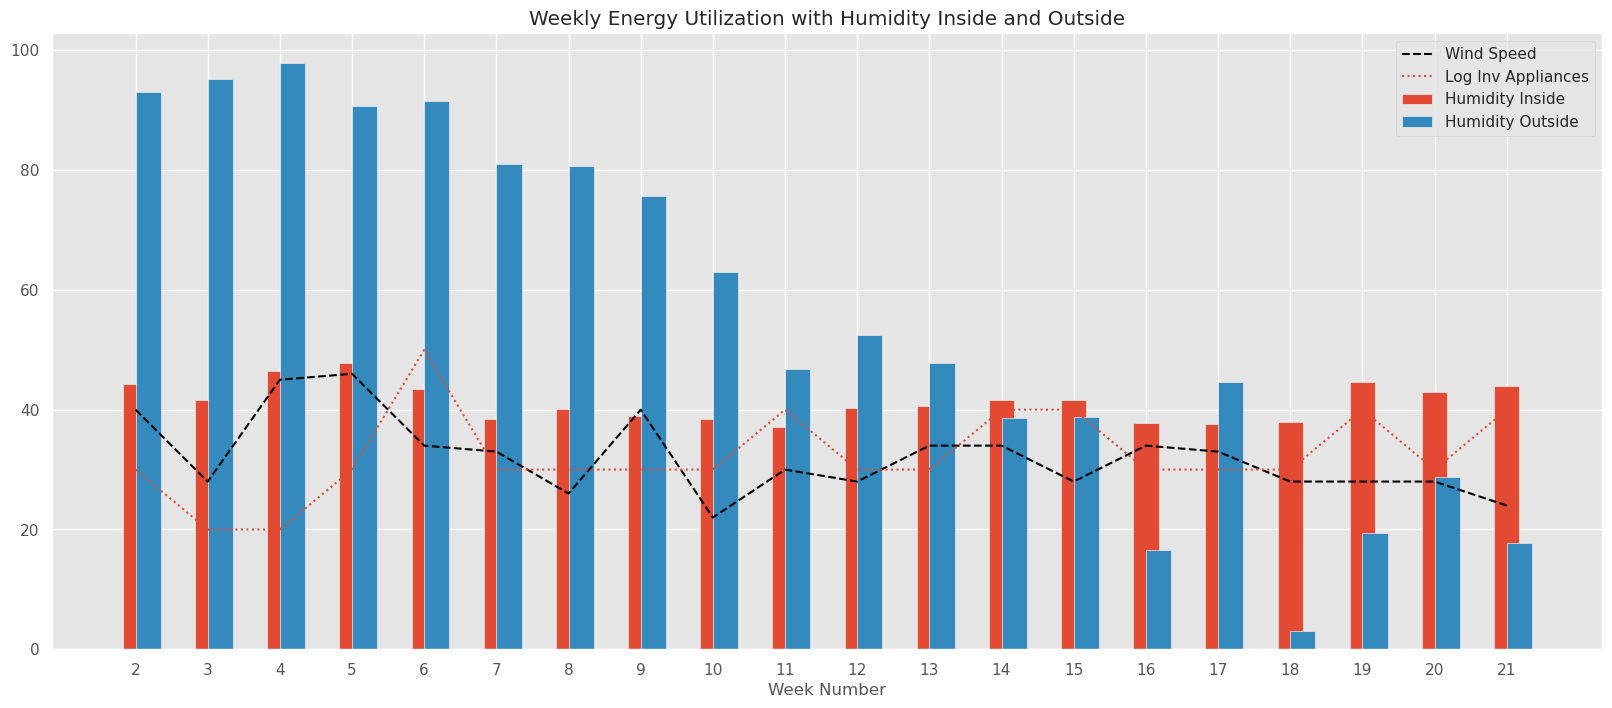

In [34]:
df['humidity_inside'] = df[['rh_1', 'rh_2', 'rh_3', 'rh_4', 'rh_5', 'rh_7', 'rh_8', 'rh_9']].mean(axis=1)
df['humidity_outside'] = df['rh_6']

df['inv_log_appliances'] = np.exp(df['appliances']) - 30 ##offsetting with -30 to compare trendlines easier

MultvariateDF = df[['week_num', 'humidity_inside', 'humidity_outside', 'windspeed', 'inv_log_appliances']].groupby('week_num')[['humidity_inside', 'humidity_outside', 'windspeed', 'inv_log_appliances']].median().reset_index()
MultvariateDF['windspeed'] = MultvariateDF['windspeed'] * 6 +10

bar_width = 0.35
bar_offset = bar_width / 2

fig, ax = plt.subplots(figsize=(20,8)) 

plt.bar(MultvariateDF['week_num'], MultvariateDF['humidity_inside'], width=bar_width, align='center', label='Humidity Inside')

plt.bar(np.array(MultvariateDF['week_num']) + bar_offset, MultvariateDF['humidity_outside'], width=bar_width, align='center', label='Humidity Outside')


plt.plot(MultvariateDF['week_num'], MultvariateDF['windspeed'], label='Wind Speed', c = 'black', linestyle = 'dashed')

plt.plot(MultvariateDF['week_num'], MultvariateDF['inv_log_appliances'], label='Log Inv Appliances', linestyle = 'dotted')



plt.xlabel('Week Number')
plt.ylabel('')
plt.title('Weekly Energy Utilization with Humidity Inside and Outside')
plt.xticks(MultvariateDF['week_num'])

plt.legend()

plt.savefig(f'Appliances-trends-with-humidity-Inside-and-Outside.png')
plt.show()

* There is a **significant difference in mean inside temperature and outside temperature,** which suggests that the space is being **artificially heated.** This also follows our initial hypothesis from the weak correlation between internal temperature and internal humidity.
* We also observe that the **inverse log transformed target (appliance power usage at actuals) sharply follows the mean internal temperature changes.** This suggests that **internal  heating is a significant driver of household energy consumption.** We can save on consumption, if we use 
    - Energy efficient heating system
    - Better insulation 
    - Fixing air leakages from the interiors to the exteriors of the house

<a id="3.4"></a>
# [3.4 Summary Observations and Recommendations](#0)

**Observations**
Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

**Humidiy columns** - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

**Appliances** - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh (inverse log transformed target) , there will be outliers in this column and there are small number of cases where consumption is very high

**Lights column** - Intially we believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . We believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence, we will dropping this column

<a id="4"></a>
# [4. Model Training, Hyperparameter tuning, Evaluation](#0)

In [35]:
from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, IsolationForest
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

import time
from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [36]:
# These features will be used to select the model, as it has train and test  split is available
feature_vars = col_temp + col_hum + col_weather +  col_time
target_vars = col_target


# We use below features after selecting the final model
model_features_vars = col_temp + col_hum + col_weather +  col_time
model_target_vars = col_target

In [37]:
# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

<a id="model_vars"></a>
**Click here for [feature groups.](#feature_vars)**

In [38]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars].drop(['rh_out', 't_out'], axis = 1)
train_y = train[target_vars]

#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars].drop(['rh_out', 't_out'], axis = 1)
test_y = test[target_vars]

# We use below features after selecting the final model
model_train_X = train[feature_vars].drop(['rh_out', 't_out'], axis = 1)
model_train_y = train[target_vars]

In [39]:
models = [
           ['Lasso', Lasso()],
           ['Ridge', Ridge()],
           ['K-Neighbors Regressor',  neighbors.KNeighborsRegressor()],
           ['SVR' , SVR(kernel='rbf')],
           ['Random Forest',RandomForestRegressor()],
           ['Extra Tree Regressor',ExtraTreesRegressor()],
           #['Gradient Boosting Classifier', GradientBoostingRegressor()] ,
           ['XGB Regressor', xgb.XGBRegressor()] ,
           #['MLP Regressor', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [40]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train R2 Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Validate R2 Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test RMSE Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [41]:
modelComparison = pd.DataFrame(model_data)
modelComparison = modelComparison.sort_values(by=['Train R2 Score', 'Validate R2 Score', 'Test RMSE Score'])
modelComparison

,Name,Train_Time,Train R2 Score,Validate R2 Score,Test RMSE Score
0,Lasso,0.013,0.075,0.069,0.633
3,SVR,7.072,0.126,0.113,0.618
1,Ridge,0.038,0.252,0.227,0.577
2,K-Neighbors Regressor,0.013,0.737,0.552,0.439
6,XGB Regressor,1.588,0.854,0.613,0.408
4,Random Forest,22.985,0.955,0.655,0.386
5,Extra Tree Regressor,6.550,1.000,0.674,0.375


In [42]:
modelComparison.set_index('Name', inplace=True)

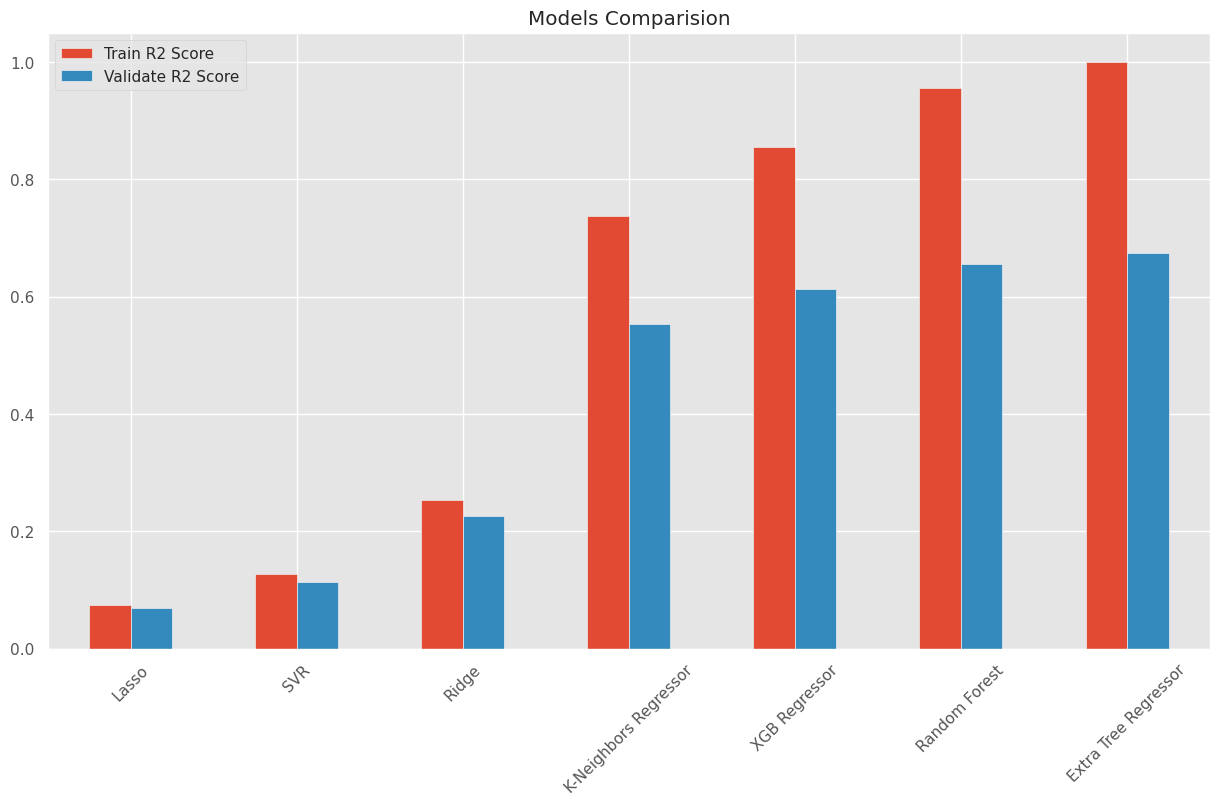

In [43]:
modelComparison[modelComparison['Validate R2 Score']>0][['Train R2 Score', 'Validate R2 Score']].plot.bar()

# plt.figure(figsize = (8, 4))
plt.xlabel('')
plt.xticks(rotation = 45)
plt.ylabel('')
plt.title('Models Comparision')
plt.savefig(f'Models-comparision.png')
plt.show()

* By comparing all the model, found `Extra Tree Regressor` giving best results. 
* Further, we will implement hyperparameters tunning on `Extra Tree Regressor`
* Below are the best features, observed for `Extra Tree Regressor`

In [44]:
xtr = ExtraTreesRegressor(criterion='poisson',max_depth=100,max_features='log2', n_estimators=350,n_jobs=-1,random_state=40)
xtr.fit(model_train_X,model_train_y)

ExtraTreesRegressor(criterion='poisson', max_depth=100, max_features='log2',
                    n_estimators=350, n_jobs=-1, random_state=40)

In [45]:
metrics.r2_score(test_y,xtr.predict(test_X))

0.6937196395339715

In [46]:
df_t["hour"] = pd.to_datetime(df_t["date"]).dt.hour
df_t["weekday"] = pd.to_datetime(df_t["date"]).dt.weekday

In [47]:
ids = list(df_t['ID'])
model_test_X = df_t[col_temp + col_hum + col_weather + col_time ].drop(['rh_out', 't_out'], axis = 1)

In [48]:
pred = xtr.predict(model_test_X)
sub_xtree = pd.DataFrame({"ID": ids, "appliances":list(pred)})
sub_xtree.to_csv("/kaggle/working/sub_xtree.csv", index=False)

In [49]:
sub_xtree.head()

,ID,appliances
0,8980,4.041
1,2754,4.532
2,9132,3.798
3,14359,4.176
4,8875,4.195


<a id="5"></a>
# [5. Inferences, Recommendations to the Client and Model Summary](#0)

## **Inferences**
- **Internal vs External humidity with Energy Consumption trend**
1. Energy usage at actuals sharply follows the trends of mean internal humidity
2. Internal heating is a significant driver of household energy consumption

We have conducted a thorough **analysis of the Energy Consumption** from the data
provided. **Some significant takeaways and recommendations** to the client are listed
below. Included are suggestions for optimizing energy usage during peak hours.
Inferences:
1. **Heating** is a significant driver of energy consumption
2. **Increased energy usage during weekends**
3. **Energy usage** at actuals sharply **follows the mean internal humidity**

## **Recommendations to Client: Optimizing Energy Utilization**

Client’s building has higher internal temperatures than ambient air. which suggests **the space is artificially
heated.** Since heating is the primary component of the client’s energy consumption, we have provided a series of recommendations, based on sound architectural and thermodynamic systems
design, which aim to:

> - reduce consumption
> - increase efficiency of existing systems, and 
> - installation of new systems, 

A detailed cost-analysis can be provided to the client if the scope of work of this contract is extended by
consensus.

**A.Retrofitting measures:** One-time, long-term solutions towards power savings
1. **Floor heating,** which causes vertical air currents for space heating
2. **Sun-room** on the western facing side to capture solar heat
3. **Double-glazed glass** walls/windows, which trap heat
4. **Vertical louvers,** along south-west walls

**B. Optimization measures:** Reducing energy consumption
1. Since weekends during January, February and March see an uptick in consumption levels, it is **recommended to switch to solar power during off-peak hours.**

2. **Humidifiers, for frequently occupied shared spaces,** would reduce energy consumption.

## **Model Summary**

- **Multiple ML algorithms were used** on the dataset to arrive at the best prediction solution
for the client.
-  We have **compared the performance of 7 machine learning estimators**
> **Lasso, Ridge, SVM, Gradient Boosting, KNN, Random Forest and Extra Tree
Regressor**
-  **ExtraTreeRegressor** model provides the best predictions for energy
consumption. 
> **We have tuned this model to achieve even better accuracy in our
predictions.**

## **Best R2 score : 78.45%**

R2 score on unseen data after hyperparameter tuning, using ExtraTreesRegressor